#  Balance of Payment  - Current Account Study

**Balance Of Payment (BOP)**

The balance of payments (BOP) is a statement of all transactions made between entities in one country and the rest of the world over a defined period of time, such as a quarter or a year.

The balance of payments divides transactions in two accounts: the *current account* and the *capital account*.The current account which is analysed here  includes transactions in goods, services, investment income, and current transfers. The capital account, broadly defined, includes transactions in financial instruments and central bank reserves.

**Current Account**

The current account deals with a country's short-term transactions or the difference between its savings and investments. These are also referred to as actual transactions (as they have a real impact on income), output and employment levels through the movement of goods and services in the economy.
Transactions are recorded in the current account in the following ways:

    

*   Exports are noted as credits in the balance of payments
   
*   Imports are recorded as debits in the balance of payments



**Deficit and Surplus**

A deficit is an amount by which a resource, especially money, falls short of what is required. A deficit occurs when expenses exceed revenues, imports exceed exports, or liabilities exceed assets. A deficit is synonymous with shortfall or loss and is the opposite of a surplus.






In [1]:
#import section for pandas 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Data**

The dataset source is [Organisation for Economic Co-operation and Development](https://stats.oecd.org/#).The data is exported with a time period between (1990-2018) in .CSV format for OECD countires only and with Annual frequency.Further filters will be applied along the way.

In [2]:
#Read .csv file
df = pd.read_csv('BOP.csv')

In [3]:

df.shape

(83089, 17)

The original data consists of 83,089 rows and 17 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83089 entries, 0 to 83088
Data columns (total 17 columns):
SUBJECT                  83089 non-null object
Subject                  83089 non-null object
LOCATION                 83089 non-null object
Country                  83089 non-null object
MEASURE                  83089 non-null object
Measure                  83089 non-null object
FREQUENCY                83089 non-null object
Frequency                83089 non-null object
TIME                     83089 non-null int64
Time                     83089 non-null int64
Unit Code                83089 non-null object
Unit                     83089 non-null object
PowerCode Code           83089 non-null int64
PowerCode                83089 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    83089 non-null float64
dtypes: float64(3), int64(3), object(11)
memory usage: 7.3+ MB


The dataset consists of 17 cloumns in a form of pairs (code and discription) and the last columns shows the values of the account


In [5]:
df.head(2)

,SUBJECT,Subject,LOCATION,Country,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value
0,B6BLTT01,"Current account, balance",CAN,Canada,NCCU,National Currency,A,Annual,1990,1990,CAD,Canadian Dollar,6,Millions,NaN,NaN,-23871.0
1,B6BLTT01,"Current account, balance",CAN,Canada,NCCU,National Currency,A,Annual,1991,1991,CAD,Canadian Dollar,6,Millions,NaN,NaN,-26174.0


The next step is to rename the labels of the columns so it can be easily used in the code by replacing space with underscore and giving more meangiful names to columns.

In [6]:
df.rename(columns={'SUBJECT':'Subject_Code','LOCATION':'Country_Code','FREQUENCY':'Frequency_Code','Unit Code':'Unit_Code','MEASURE':'Measure_Code'},inplace=True )
df.head(2)

,Subject_Code,Subject,Country_Code,Country,Measure_Code,Measure,Frequency_Code,Frequency,TIME,Time,Unit_Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value
0,B6BLTT01,"Current account, balance",CAN,Canada,NCCU,National Currency,A,Annual,1990,1990,CAD,Canadian Dollar,6,Millions,NaN,NaN,-23871.0
1,B6BLTT01,"Current account, balance",CAN,Canada,NCCU,National Currency,A,Annual,1991,1991,CAD,Canadian Dollar,6,Millions,NaN,NaN,-26174.0


In the next section , the data is explored to show what countries along with its codes,the currency of the values and different accounts.The countires contains an entry of "*European Union (28 countries)*" with code "*EU28*" , This will be used through our analysis.

In [7]:
# Explore available countires and corresponding coutnry codes
pd.Series(df.Country.values,index=df.Country_Code).to_dict()

{'CAN': 'Canada',
 'KOR': 'Korea',
 'USA': 'United States',
 'AUS': 'Australia',
 'JPN': 'Japan',
 'CHE': 'Switzerland',
 'NZL': 'New Zealand',
 'CHL': 'Chile',
 'EST': 'Estonia',
 'AUT': 'Austria',
 'ITA': 'Italy',
 'CZE': 'Czech Republic',
 'SVK': 'Slovak Republic',
 'FRA': 'France',
 'PRT': 'Portugal',
 'GBR': 'United Kingdom',
 'LVA': 'Latvia',
 'NLD': 'Netherlands',
 'DEU': 'Germany',
 'IRL': 'Ireland',
 'ISL': 'Iceland',
 'BEL': 'Belgium',
 'LUX': 'Luxembourg',
 'SVN': 'Slovenia',
 'HUN': 'Hungary',
 'FIN': 'Finland',
 'GRC': 'Greece',
 'NOR': 'Norway',
 'DNK': 'Denmark',
 'ESP': 'Spain',
 'POL': 'Poland',
 'TUR': 'Turkey',
 'SWE': 'Sweden',
 'ISR': 'Israel',
 'LTU': 'Lithuania',
 'EU28': 'European Union (28 countries)',
 'MEX': 'Mexico'}

In [8]:
# Explore available measure and corresponding measure codes
pd.Series(df.Measure.values,index=df.Measure_Code).to_dict()

{'NCCU': 'National Currency',
 'CXCU': 'US-Dollar converted',
 'NCCUSA': 'National Currency, Seasonally adjusted',
 'CXCUSA': 'US-Dollar converted, Seasonally adjusted'}

In [9]:
# Explore available balances and corresponding balances codes
pd.Series(df.Subject.values,index=df.Subject_Code).sort_values().to_dict()

{'B6CATT00': 'Capital account, balance',
 'B6CACR00': 'Capital account, credits',
 'B6CADB00': 'Capital account, debits',
 'B6CATT02': 'Capital transfers, balance',
 'B6CACR02': 'Capital transfers, credits',
 'B6CADB02': 'Capital transfers, debits',
 'B6BLTT01': 'Current account, balance',
 'B6CRTT01': 'Current account, credits',
 'B6DBTT01': 'Current account, debits',
 'B6FADI01': 'Direct investment, net',
 'B6FADI02': 'Direct investment, net acquisition of financial assets',
 'B6FADI03': 'Direct investment, net incurrence of liabilities',
 'B6FATT01': 'Financial account, net',
 'B6FATC01': 'Financial account, net acquisition of financial assets',
 'B6FATD01': 'Financial account, net incurrence of liabilities',
 'B6FAFD01': 'Financial derivatives, net',
 'B6BLTD21': 'Goods acquired under merchanting (negative credits), balance',
 'B6CRTD21': 'Goods acquired under merchanting (negative credits), credits',
 'B6BLTD22': 'Goods sold under merchanting, balance',
 'B6CRTD22': 'Goods sold un


*   The next section is about filtering data by current account, balance, debits and credits for all countries. Debits and credits will be used to assess the import and export,respectively.In addition to that, data is filtered to be measured with "USD, seasonally adjusted" which has code "CXCUSA".







In [10]:
#Dataframe for all current accounts (debits,credit,balance) of all OECD countries in adjusted USD
df_current_all_countires = df[ (df['Subject'].str.contains('Current account')) \
                              & ( df['Measure_Code'] == 'CXCUSA')].iloc[:,np.r_[0:7,9:13,16]]

*   The second dataset is drived from the first one - df_current_all_countires - but contains individal countries of EU.

In [11]:
#List of the EU countires in the data
EU_Countires = ['AUT','BEL','CZE','DNK','EST','FIN','FRA','DEU','GBR','GRC','HUN','IRL','ITA',\
                'LVA','LUX','LTU','NLD','POL','PRT','SVK','SVN','SWE','ESP']
#Dataframe for all current accounts (debits,credit,balance) of all EU countires in the above list in adjusted USD
df_current_EU_countires = df_current_all_countires[(df_current_all_countires['Country_Code'].isin(EU_Countires))]


*   The third dataset is drived from the first one - df_current_all_countires - but contains EU28 only.



In [12]:
#Dataframe for all current accounts (debits,credit,balance ) of EU28 in adjusted USD
df_current_EU28 = df_current_all_countires[(df_current_all_countires['Country_Code'] == "EU28")]\
.sort_values(by='Time').reset_index(drop=True)

In [13]:
#Filter to contains only "Current account, balance"
df_current_EU_countires_balance = df_current_EU_countires.query('Subject == "Current account, balance"')
df_current_EU28_balance = df_current_EU28.query('Subject == "Current account, balance"')


The first data quality issue that can be observed here is that 23 out of the 28 countries of EU is presented in data.There are 5 missing  countries which are (Bulgaria,Croatia,Cyprus,Malta,Romania)



In [14]:
len(EU_Countires)

23

The second data quality issue is the missing data.29 rows for each country are expected between(1990-2018),  Only United Kingdom and Sweden have that number of data rows as shown below.


In [15]:
df_current_EU_countires_balance.groupby('Country')['Time'].count().sort_values(ascending=False)

Country
United Kingdom     29
Sweden             29
Germany            28
Spain              26
Czech Republic     26
Estonia            26
Finland            24
Hungary            24
Italy              24
Luxembourg         24
Slovenia           24
Austria            24
Portugal           23
France             20
Latvia             19
Ireland            17
Greece             17
Belgium            16
Lithuania          15
Netherlands        15
Poland             15
Slovak Republic    15
Denmark            14
Name: Time, dtype: int64

The same issue exists for EU28 where only data from 1999 to 2018 can be found

In [16]:
print(f"Minumim year is {df_current_EU28_balance.Time.min()} ,While Maximum year is {df_current_EU28_balance.Time.max()} ")

Minumim year is 1999 ,While Maximum year is 2018 


The next section analyzes the current account balance of EU28.This analysis used to compare the aggregated total of all the 28 countries of the EU with EU28 in the period between 1999-2018 as data is missing before that date. The result shows that the total balances are different. This could be correct in the duration between 1999-2004 before the EU enlargement, but after 2004 the data should be matched. This is not what the data shows which could be considered as the third data quality issue.

In [17]:
(df_current_EU_countires_balance.query('Time >=1999')\
 .groupby('Time').Value.sum() == df_current_EU28_balance.groupby('Time').Value.sum()).any()


False

**Exploring and Cleaning the data**

In [18]:
#EU28 Data Frame has no NA values
df_current_EU28.isna().sum()

Subject_Code      0
Subject           0
Country_Code      0
Country           0
Measure_Code      0
Measure           0
Frequency_Code    0
Time              0
Unit_Code         0
Unit              0
PowerCode Code    0
Value             0
dtype: int64

In [19]:
#EU28 Data Frame has no duplicated values
df_current_EU28.duplicated().sum()

0

In [20]:
df_current_EU28.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
Subject_Code      60 non-null object
Subject           60 non-null object
Country_Code      60 non-null object
Country           60 non-null object
Measure_Code      60 non-null object
Measure           60 non-null object
Frequency_Code    60 non-null object
Time              60 non-null int64
Unit_Code         60 non-null object
Unit              60 non-null object
PowerCode Code    60 non-null int64
Value             60 non-null float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ KB


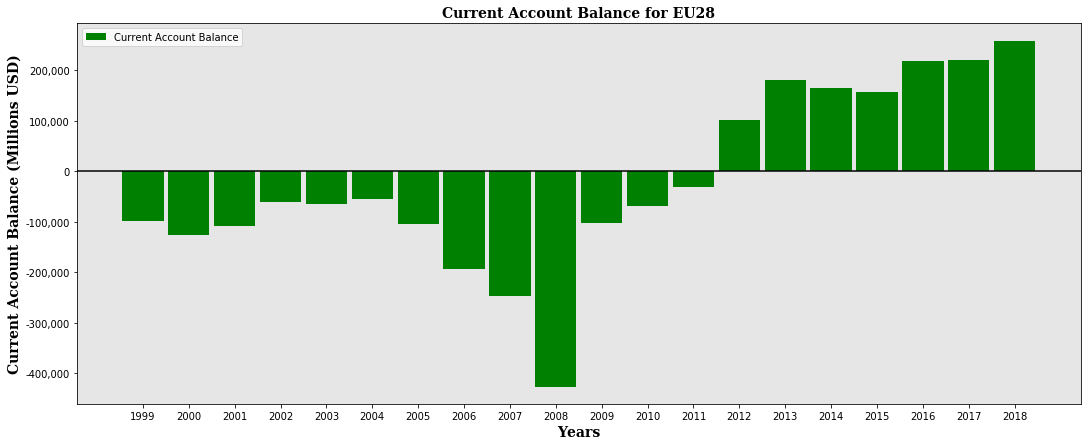

In [21]:
#Define function plot_bar to plot all the bars
font_black = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
def plot_bar(x_data,y_data,color,graph_label,x_label,y_label,title,width,rotation=0):
    f, ax = plt.subplots(figsize=(18,7))
    ax.set_facecolor((.9, .9, .9)) 
    x_pos = list(range(len(x_data)))
    shift=0
    for i,y in enumerate(y_data):
        plt.bar([x+shift for x in x_pos],y, color=color[i],label=graph_label[i],width=width)
        shift = shift+width
    plt.xticks([ x+ ( (shift-width)/(i+1)if i>0 else 0) for x in x_pos],x_data,fontsize=10,rotation=rotation);
    plt.title(title,fontdict=font_black)
    plt.xlabel(x_label,fontdict=font_black)
    plt.ylabel(y_label,fontdict=font_black)
    plt.axhline(0, color='black')
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.legend();

plot_bar(df_current_EU28_balance.Time,[df_current_EU28_balance.Value],['green'],["Current Account Balance"],\
         "Years","Current Account Balance (Millions USD)","Current Account Balance for EU28",width=.9)

In order to fill the data gap between 1990-1998,two techniques could be developed .The first one is to fill it with the aggregated balance of the 28 countries , but since the data for the countries are also not complete , the moving average for the last 4 years will be the technique used to add the missing data.

In [22]:
#Function to calulate the moving average of account values to fill the missing data between 1990-1998
def moving_avg(start,end,df,account_code,account_name):
    for i in range(end,start,-1):
        data = []
        average = df.loc[:4,'Value'].mean()
        data.insert(0,{'Subject_Code':account_code,'Subject':account_name,'Country_Code':'EU28','Country':'European Union (28 countries)','Measure_Code':'CXCUSA','Measure':'US-Dollar converted, Seasonally adjusted','Frequency_Code':'A','Time':i,'Unit_Code':'USD','Unit':'US Dollar','PowerCode Code':'6','Value':average})
        df = pd.concat([pd.DataFrame(data), df], ignore_index=True)
    return df

df_current_EU28_balance = moving_avg(1989,1998,df_current_EU28_balance,'B6BLTT01','Current account, balance')


The graph shows that the total balance was in negative (deficit) during the period 1990-2011 which indicates that the countires imports(debits) were more than exports(credits).After 2011 ,the graph shows a surplus as credits exceeded debits.

In addition to that , The graph shows a sevre deficit happend at 
2008 which is expected due to the 2008-financial crisis.

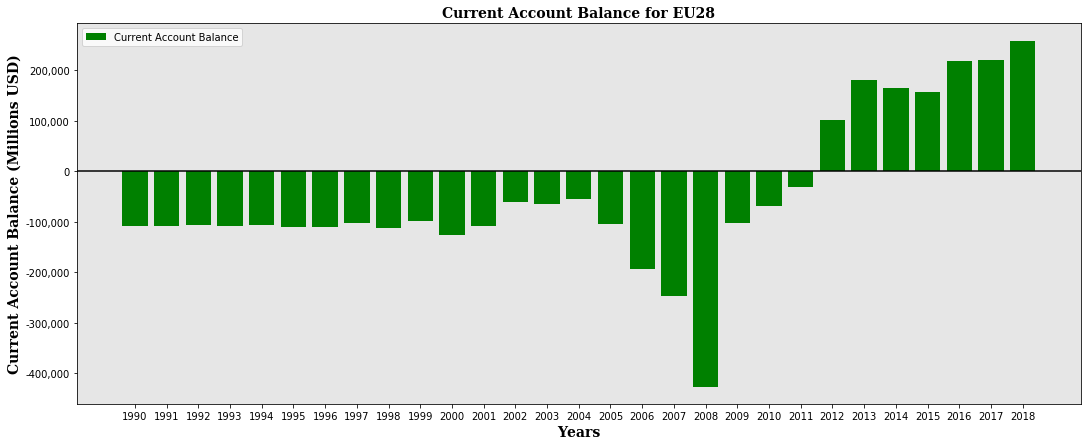

In [23]:
#using the pre-defined function to plot the bar after adding missing data 1990-1998
plot_bar(df_current_EU28_balance.Time,[df_current_EU28_balance.Value],['green'],["Current Account Balance"],\
         "Years","Current Account Balance (Millions USD)","Current Account Balance for EU28",width=.8)

In order to have a closer look on data distribution, a histogram has been derived from the account balance data. The graph shows that the average value is -46,946 million USD with standard deviation of 152,745.5 million USD , and the most frequent balance (mode) over the period 1990-2018 is around 100,000 Million USD.The maximum account balance was 258,369 Million USD at 2018 while the minimum account balance was -425,841.6 Million USD at 2008.

In [24]:
df_current_EU28_balance.Value.describe()

count        29.000000
mean     -46946.094929
std      152745.576123
min     -425841.600000
25%     -108604.300000
50%     -103267.900000
75%      -31127.200000
max      258369.600000
Name: Value, dtype: float64

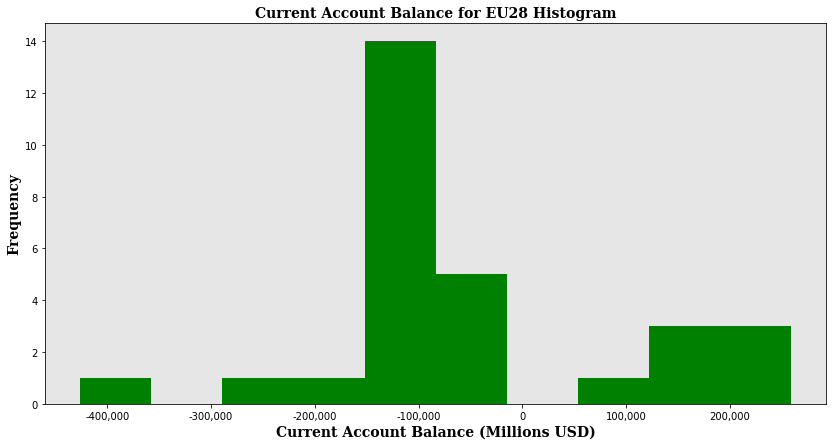

In [25]:
f, ax = plt.subplots(figsize=(14,7));
ax.set_facecolor((.9, .9, .9));
plt.hist(df_current_EU28_balance.Value, color='green');
plt.xlabel("Current Account Balance (Millions USD)",fontdict=font_black);
plt.ylabel("Frequency",fontdict=font_black);
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title("Current Account Balance for EU28 Histogram",fontdict=font_black);

**Analysis of Debits(Imports) and Credits(Exports) for EU28**

In the following section , current account debits(imports) and credits (exports) for EU28 are analyzed to show how they changed over the period from 1990-2018.

In [26]:
#Create two Data Frames for EU28 debits and credits
df_current_EU28_debits = df_current_EU28.query('Subject == "Current account, debits"')
df_current_EU28_credits = df_current_EU28.query('Subject == "Current account, credits"')

In [27]:
#The same issue , data is found between 1999-2018 only
print(f"Minumim year for debits is {df_current_EU28_debits.Time.min()} While Minumim year is {df_current_EU28_debits.Time.max()} ")
print(f"Minumim year for credits is {df_current_EU28_credits.Time.min()} While Minumim year is {df_current_EU28_credits.Time.max()} ")

Minumim year for debits is 1999 While Minumim year is 2018 
Minumim year for credits is 1999 While Minumim year is 2018 


In [28]:
#Use the same function "moving_avg" to fill the period 1990-1998 
df_current_EU28_debits = moving_avg(1989,1998,df_current_EU28_debits,'B6DBTT01','Current account, debits')
df_current_EU28_credits= moving_avg(1989,1998,df_current_EU28_credits,'B6CRTT01','Current account, credits')

In [29]:
print(f"Minumim year for debits is {df_current_EU28_debits.Time.min()} ,While Maximum year is {df_current_EU28_debits.Time.max()} ")
print(f"Minumim year for credits is {df_current_EU28_credits.Time.min()} ,While Maximum year is {df_current_EU28_credits.Time.max()} ")

Minumim year for debits is 1990 ,While Maximum year is 2018 
Minumim year for credits is 1990 ,While Maximum year is 2018 


The data shows that the trade transactions (both exports and imports) have been grew to more than the double in the period 1990-2018.However exports have been exceeding imports since 2012 producing a surplus. The possible reasons behind the growth could be the new members joined EU or maybe an effect of fixable trade policies between EU countries.


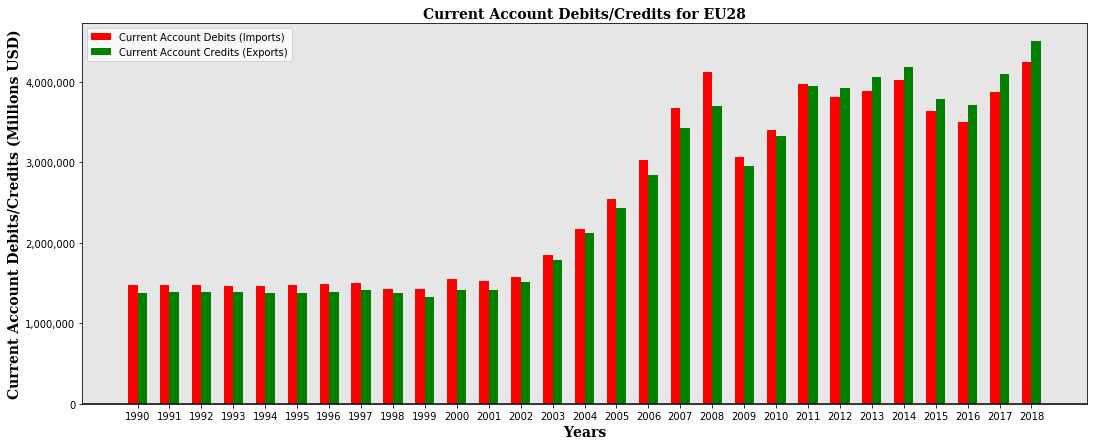

In [30]:
#using the pre-defined function to plot the bar after adding missing data 1990-1998
plot_bar(df_current_EU28_debits.Time,[df_current_EU28_debits.Value,df_current_EU28_credits.Value],['red','green']\
         ,["Current Account Debits (Imports)","Current Account Credits (Exports)"],"Years",\
         "Current Account Debits/Credits (Millions USD)","Current Account Debits/Credits for EU28"
         ,width=0.3)

The next analysis will focus on the average current balance for all the EU countries presented in the dataset (23 countries) between 1990-2018.

In [31]:
#Dataframe of Avergae Current Balance by Country in the period 1990-2018
df_current_EU_countires_balance_mean = df_current_EU_countires_balance.groupby(['Country'],as_index=False)['Value'].mean()
df_current_EU_countires_balance_mean.sort_values(by='Value',ascending=False).query('Value>0')

,Country,Value
7,Germany,116525.666036
15,Netherlands,66783.074667
3,Denmark,19210.661929
21,Sweden,16651.617621
0,Austria,5186.530083
1,Belgium,4086.320975
5,Finland,3813.886125
14,Luxembourg,3065.587333
11,Italy,1402.105833
19,Slovenia,184.818665


In [32]:
df_current_EU_countires_balance_mean.sort_values(by='Value',ascending=False).query('Value<0')

,Country,Value
4,Estonia,-475.859274
12,Latvia,-1122.099289
13,Lithuania,-1297.841347
10,Ireland,-2132.958671
9,Hungary,-2447.875035
2,Czech Republic,-2500.976869
18,Slovak Republic,-2597.929913
6,France,-3218.202300
17,Portugal,-10758.155887
16,Poland,-14422.494687


The data shows that only 10 countries have a a positive balance which means that exports exceed imports.Thoese countries are:

1.Germany

2.Netherlands

3.Denmark

4.Sweden

5.Austria

6.Belgium

7.Finland

8.Luxembourg

9.Italy

10.Slovenia

On the other side ,United Kingdom comes at the last position with 61,024.38 million USD of deficit which could be one of the reason behind the Brexit in 2020.

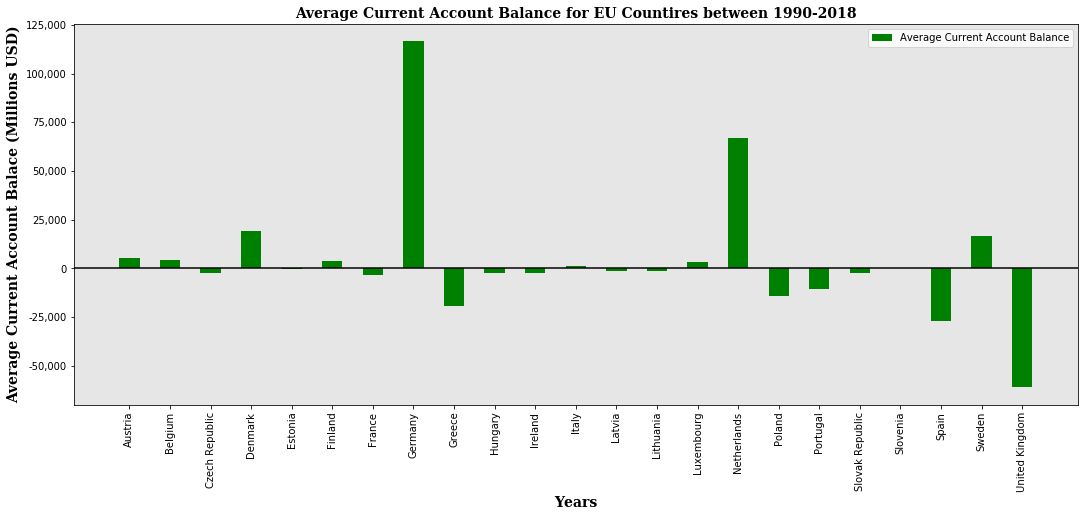

In [33]:
plot_bar(df_current_EU_countires_balance_mean.Country,[df_current_EU_countires_balance_mean.Value],['green']\
         ,["Average Current Account Balance"],"Years",\
         "Average Current Account Balace (Millions USD)","Average Current Account Balance for EU Countires between 1990-2018"
         ,width=0.5,rotation=90)